<a href="https://colab.research.google.com/github/sedanurozer/cifar10/blob/main/cifar10_84_ipynb_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, DepthwiseConv2D

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

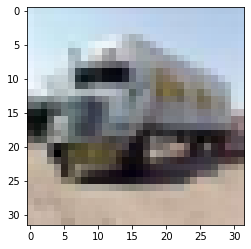

In [ ]:
plt.imshow(x_test[2150])

In [ ]:
model_layers = [
    Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', depth_multiplier=3),
    Dropout(rate =0.1),
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
    Dropout(rate = 0.1),
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
    Dropout(rate = 0.4),
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation='relu'),
    Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
    Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation='relu'),
    Dropout(rate = 0.4),
    Flatten(),
    Dropout(rate = 0.3),
    Dense(2048, activation='relu'),
    Dropout(rate = 0.3),
    Dense(512, activation='relu'),
    Dropout(rate = 0.4),
    Dense(10, activation='softmax')
] 
model = Sequential(model_layers)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [ ]:
model_train= model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6759 - sparse_categorical_accuracy: 0.3726
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0692 - sparse_categorical_accuracy: 0.6247
Epoch 3/20
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9057 - sparse_categorical_accuracy: 0.6872
Epoch 4/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7853 - sparse_categorical_accuracy: 0.7268
Epoch 5/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7225 - sparse_categorical_accuracy: 0.7480
Epoch 6/20
1563/1563 [==============================] - 27s 18ms/step - loss: 0.6669 - sparse_categorical_accuracy: 0.7698
Epoch 7/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6184 - sparse_categorical_accuracy: 0.7881
Epoch 8/20
1563/1563 [==============================] - 27s 18ms/step - loss: 0.5846 - sparse_categorical_accuracy: 0.7992
Epoch 9/20
1563/

In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy: %',test_eval[1]*100)

Test loss: 0.47184818983078003
Test accuracy: % 84.5300018787384


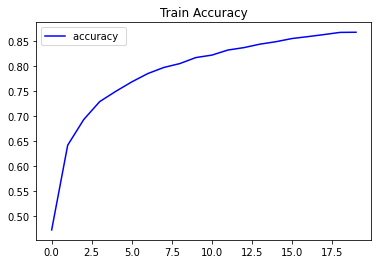

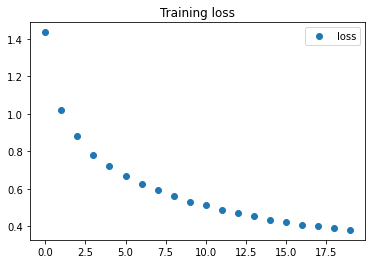

In [ ]:
accuracy = model_train.history['sparse_categorical_accuracy']
loss = model_train.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy, 'b', label='accuracy ')
plt.title('Train Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'o', label='loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()



